In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from functools import reduce

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-126-cd58ac80fd49>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [127]:
df = pd.read_csv('data/data-GWdww.csv')
print(df.shape)
df.head()

(114, 3)


,Postal code,Area,Health Unit
0,M1B,Scarborough South,Toronto
1,M1C,Scarborough South,Toronto
2,M1E,Scarborough South,Toronto
3,M1G,Scarborough South,Toronto
4,M1H,Scarborough South,Toronto


In [8]:
import zipfile

zf = zipfile.ZipFile('data/test.zip')

In [12]:
df = pd.read_csv(zf.open('data-GWdww.csv'))
print(df.shape)
df.head()

(114, 3)


,Postal code,Area,Health Unit
0,M1B,Scarborough South,Toronto
1,M1C,Scarborough South,Toronto
2,M1E,Scarborough South,Toronto
3,M1G,Scarborough South,Toronto
4,M1H,Scarborough South,Toronto


## Process of finding Geo dataset for Ontario

### Attempt 1

link: https://stackoverflow.com/questions/58043978/display-data-on-real-map-based-on-postal-code

### Attempt 2

In [51]:
canada = gpd.read_file("zip:///Users\Owner\Desktop\mapping\data\lpr_000b16a_e.zip")
canada

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [57]:
canada.shape, type(canada)

((13, 7), geopandas.geodataframe.GeoDataFrame)

In [53]:
canada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRUID     13 non-null     object  
 1   PRNAME    13 non-null     object  
 2   PRENAME   13 non-null     object  
 3   PRFNAME   13 non-null     object  
 4   PREABBR   13 non-null     object  
 5   PRFABBR   13 non-null     object  
 6   geometry  13 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 856.0+ bytes


In [54]:
canada[canada['PRUID']=='35']

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."


## Map It!

In [55]:
import plotly_express as px

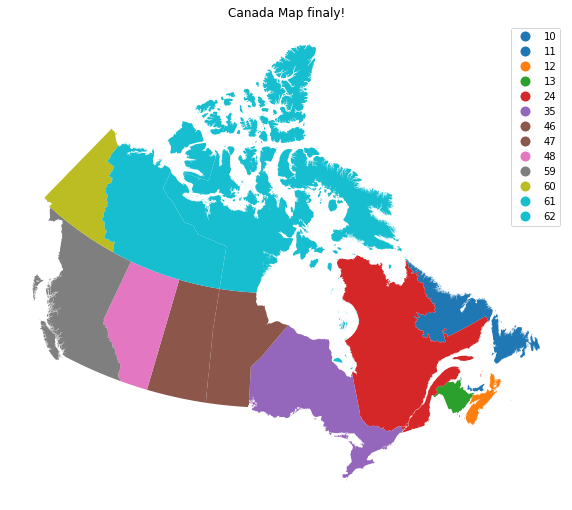

In [56]:
ax = canada.plot(column='PRUID', legend=True, figsize=(10,10))
ax.set_title('Canada Map finaly!')
ax.axis('off')
plt.show()

## Attempt 3:

In [61]:
toronto = pd.read_csv('data/Neighbourhoods.csv')
toronto.sampleple(5)

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry,CLASSIFICATION,CLASSIFICATION_CODE
12,11493,2480059,26005439,NaN,83,83,Dufferin Grove (83),Dufferin Grove (83),NaN,NaN,NaN,NaN,17545297,2.653484e+06,7114.420589,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
100,11581,2480158,26005538,NaN,114,114,Lambton Baby Point (114),Lambton Baby Point (114),NaN,NaN,NaN,NaN,17546705,3.406857e+06,11181.788316,"{u'type': u'Polygon', u'coordinates': (((-79.5...",NaN,NaN
110,11591,2480155,26005535,NaN,15,15,Kingsway South (15),Kingsway South (15),NaN,NaN,NaN,NaN,17546865,5.043477e+06,11140.672714,"{u'type': u'Polygon', u'coordinates': (((-79.5...",NaN,NaN
46,11527,2480116,26005496,NaN,111,111,Rockcliffe-Smythe (111),Rockcliffe-Smythe (111),NaN,NaN,NaN,NaN,17545841,9.700564e+06,16065.595360,"{u'type': u'Polygon', u'coordinates': (((-79.5...",Neighbourhood Improvement Area,NIA
134,11615,2480143,26005523,NaN,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,NaN,NaN,17547249,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN


In [60]:
print(toronto.shape)
toronto.info()

(140, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  140 non-null    int64  
 1   AREA_ID              140 non-null    int64  
 2   AREA_ATTR_ID         140 non-null    int64  
 3   PARENT_AREA_ID       0 non-null      float64
 4   AREA_SHORT_CODE      140 non-null    int64  
 5   AREA_LONG_CODE       140 non-null    int64  
 6   AREA_NAME            140 non-null    object 
 7   AREA_DESC            140 non-null    object 
 8   X                    0 non-null      float64
 9   Y                    0 non-null      float64
 10  LONGITUDE            0 non-null      float64
 11  LATITUDE             0 non-null      float64
 12  OBJECTID             140 non-null    int64  
 13  Shape__Area          140 non-null    float64
 14  Shape__Length        140 non-null    float64
 15  geometry             140 non-n

## Attempt 4:

In [66]:
toronto = gpd.read_file('data/Neighbourhoods/Neighbourhoods.shp')
toronto.head(3)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry
0,11481,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,None,None,None,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,11482,2480140,26005520,None,95,95,Annex (95),Annex (95),None,None,None,None,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,11483,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,None,None,None,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."


<AxesSubplot:>

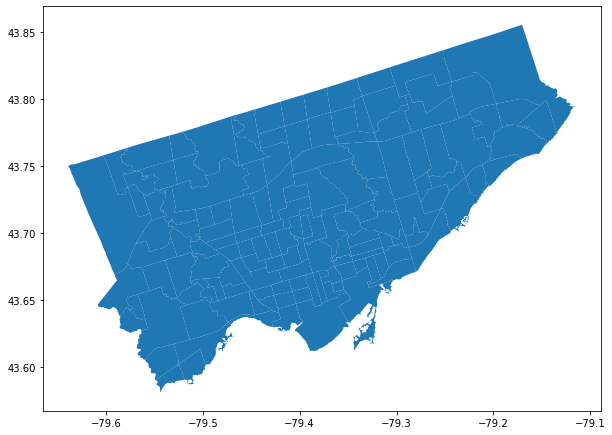

In [64]:
toronto.plot(figsize=(10,10))

<ipython-input-72-a075b51e7f6a>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


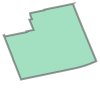

In [72]:
toronto.geometry[0]

## Attempt 5:

In [6]:
canada = gpd.read_file("zip:///Users\Owner\Desktop\mapping\data\lrnf000r20a_e.zip")
canada.head()

,NGD_UID,NAME,TYPE,DIR,AFL_VAL,ATL_VAL,AFR_VAL,ATR_VAL,CSDUID_L,CSDNAME_L,...,CSDUID_R,CSDNAME_R,CSDTYPE_R,PRUID_L,PRNAME_L,PRUID_R,PRNAME_R,RANK,CLASS,geometry
0,107215,Alec,RD,None,8126,8240,8173,8243,5917015,Central Saanich,...,5917015,Central Saanich,DM,59,British Columbia / Colombie-Britannique,59,British Columbia / Colombie-Britannique,5,23,"LINESTRING (3960597.411 1952862.777, 3960605.6..."
1,3206465,70,HWY,None,123,131,122,126,1001365,Victoria,...,1001365,Victoria,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,4,12,"LINESTRING (8935036.860 2147931.914, 8934958.0..."
2,1609984,None,None,None,None,None,None,None,4708074,Snipe Lake No. 259,...,4708074,Snipe Lake No. 259,RM,47,Saskatchewan,47,Saskatchewan,5,23,"LINESTRING (5032461.060 1824835.834, 5031609.2..."
3,5628186,de la Rivière,RUE,None,717,721,700,728,2446080,Cowansville,...,2446080,Cowansville,V,24,Quebec / Québec,24,Quebec / Québec,3,23,"LINESTRING (7698238.814 1230648.543, 7698195.1..."
4,5469054,Henri-Bourassa,BOUL,E,None,None,None,None,2466023,Montréal,...,2466023,Montréal,V,24,Quebec / Québec,24,Quebec / Québec,4,23,"LINESTRING (7625178.291 1255497.869, 7625189.6..."


In [7]:
canada.shape

(2236518, 21)

In [8]:
canada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2236518 entries, 0 to 2236517
Data columns (total 21 columns):
 #   Column     Dtype   
---  ------     -----   
 0   NGD_UID    object  
 1   NAME       object  
 2   TYPE       object  
 3   DIR        object  
 4   AFL_VAL    object  
 5   ATL_VAL    object  
 6   AFR_VAL    object  
 7   ATR_VAL    object  
 8   CSDUID_L   object  
 9   CSDNAME_L  object  
 10  CSDTYPE_L  object  
 11  CSDUID_R   object  
 12  CSDNAME_R  object  
 13  CSDTYPE_R  object  
 14  PRUID_L    object  
 15  PRNAME_L   object  
 16  PRUID_R    object  
 17  PRNAME_R   object  
 18  RANK       object  
 19  CLASS      object  
 20  geometry   geometry
dtypes: geometry(1), object(20)
memory usage: 358.3+ MB


In [9]:
ontario = canada[canada['PRNAME_L']=='Ontario']
ontario.shape

(568105, 21)

In [17]:
ontario.head(2)

,NGD_UID,NAME,TYPE,DIR,AFL_VAL,ATL_VAL,AFR_VAL,ATR_VAL,CSDUID_L,CSDNAME_L,...,CSDUID_R,CSDNAME_R,CSDTYPE_R,PRUID_L,PRNAME_L,PRUID_R,PRNAME_R,RANK,CLASS,geometry
5,1368641,Maple,ST,None,116,116,None,None,3552092,Chapleau,...,3552092,Chapleau,TP,35,Ontario,35,Ontario,5,23,"LINESTRING (6834383.237 1341763.500, 6834388.254 1341760.337, 6834401.469 1341760.483, 6834476.649 1341792.294)"
6,1839341,Lindsay,ST,N,None,None,194,196,3516010,Kawartha Lakes,...,3516010,Kawartha Lakes,CY,35,Ontario,35,Ontario,5,23,"LINESTRING (7260130.523 1018933.637, 7260086.706 1019009.714)"


In [22]:
ontario.drop(ontario.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace=True)

C:\Users\Owner\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
ontario.head(2)

,CSDUID_L,CSDNAME_L,CSDTYPE_L,CSDUID_R,CSDNAME_R,CSDTYPE_R,PRUID_L,PRNAME_L,PRUID_R,PRNAME_R,RANK,CLASS,geometry
5,3552092,Chapleau,TP,3552092,Chapleau,TP,35,Ontario,35,Ontario,5,23,"LINESTRING (6834383.237 1341763.500, 6834388.254 1341760.337, 6834401.469 1341760.483, 6834476.649 1341792.294)"
6,3516010,Kawartha Lakes,CY,3516010,Kawartha Lakes,CY,35,Ontario,35,Ontario,5,23,"LINESTRING (7260130.523 1018933.637, 7260086.706 1019009.714)"


<AxesSubplot:>

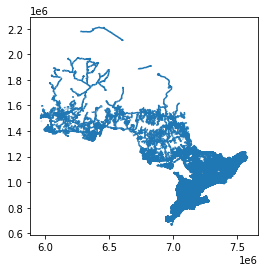

In [24]:
ontario.plot()

## Attempt 6:

In [28]:
canada = gpd.read_file("zip:///Users\Owner\Desktop\mapping\data\grnf035r10a_e.zip")
canada.head()

,RB_UID,NAME,TYPE,DIRECTION,ADDR_FM_LE,ADDR_TO_LE,ADDR_FM_RG,ADDR_TO_RG,geometry
0,2041706,Templeton,ST,None,395.0,405.0,390.0,390.0,"LINESTRING (-75.67139 45.42372, -75.67053 45.42407)"
1,1954323,Armstrong,ST,S,NaN,NaN,NaN,NaN,"LINESTRING (-79.67112 47.50662, -79.67107 47.50556)"
2,1953512,None,None,None,NaN,NaN,NaN,NaN,"LINESTRING (-79.73897 47.72525, -79.73893 47.72184, -79.73894 47.71083)"
3,3875992,Lindenwood,RD,None,363119.0,363201.0,363170.0,363192.0,"LINESTRING (-81.00758 44.68514, -81.00415 44.68523, -81.00000 44.68537, -80.99986 44.68537, -80.98870 44.68577, -80.98668 44.68583)"
4,1804723,Henderson,ST,None,142.0,152.0,143.0,151.0,"LINESTRING (-81.53813 43.14578, -81.53825 43.14540, -81.53840 43.14493, -81.53835 43.14479)"


In [30]:
canada.shape

(471089, 9)

<AxesSubplot:>

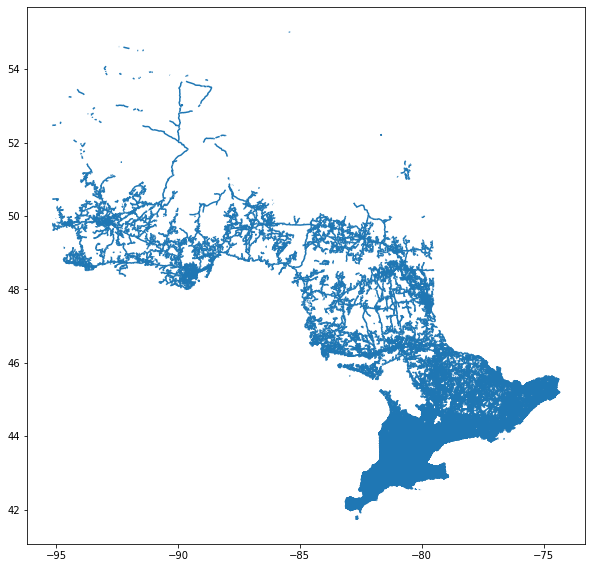

In [31]:
canada.plot(figsize=(10,10))

## Attempt 7:

In [33]:
canada = gpd.read_file("zip:///Users\Owner\Desktop\mapping\data\lcsd000b16a_e.zip")
canada.head()

CSDUID                                       CSDNAME CSDTYPE PRUID  \
0  1001181  Riverhead                                     T       10     
1  1001186  Admirals Beach                                T       10     
2  1001192  St. Joseph's                                  T       10     
3  1001197  Mount Carmel-Mitchells Brook-St. Catherine's  T       10     
4  1001219  Branch                                        T       10     

                                                PRNAME CDUID           CDNAME  \
0  Newfoundland and Labrador / Terre-Neuve-et-Labrador  1001  Division No.  1   
1  Newfoundland and Labrador / Terre-Neuve-et-Labrador  1001  Division No.  1   
2  Newfoundland and Labrador / Terre-Neuve-et-Labrador  1001  Division No.  1   
3  Newfoundland and Labrador / Terre-Neuve-et-Labrador  1001  Division No.  1   
4  Newfoundland and Labrador / Terre-Neuve-et-Labrador  1001  Division No.  1   

  CDTYPE   CCSUID                   CCSNAME ERUID            ERNAME SACCODE  \
0  CDR    1001214  Division No.  1, Subd. C  1010  Avalon Peninsula  999      
1  CDR    1001214  Division No.  1, Subd. C  1010  Avalon Peninsula  999      
2  CDR    1001214  Division No.  1, Subd. C  1010  Avalon Peninsula  999      
3  CDR    1001214  Division No.  1, Subd. C  1010  Avalon Peninsula  997      
4  CDR    1001214  Division No.  1, Subd. C  1010  Avalon Peninsula  999      

  SACTYPE CMAUID CMAPUID CMANAME CMATYPE  \
0  7       None   None    None    None     
1  7       None   None    None    None     
2  7       None   None    None    None     
3  5       None   None    None    None     
4  7       None   None    None    None     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [34]:
canada.shape

(5162, 19)

In [35]:
canada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CSDUID    5162 non-null   object  
 1   CSDNAME   5162 non-null   object  
 2   CSDTYPE   5162 non-null   object  
 3   PRUID     5162 non-null   object  
 4   PRNAME    5162 non-null   object  
 5   CDUID     5162 non-null   object  
 6   CDNAME    5162 non-null   object  
 7   CDTYPE    5162 non-null   object  
 8   CCSUID    5162 non-null   object  
 9   CCSNAME   5162 non-null   object  
 10  ERUID     5162 non-null   object  
 11  ERNAME    5162 non-null   object  
 12  SACCODE   5162 non-null   object  
 13  SACTYPE   5162 non-null   object  
 14  CMAUID    966 non-null    object  
 15  CMAPUID   966 non-null    object  
 16  CMANAME   966 non-null    object  
 17  CMATYPE   966 non-null    object  
 18  geometry  5162 non-null   geometry
dtypes: geometry(1), object(18)
memory usage:

In [37]:
canada['PRNAME'].unique()

array(['Newfoundland and Labrador / Terre-Neuve-et-Labrador',
       'Prince Edward Island / Île-du-Prince-Édouard',
       'Nova Scotia / Nouvelle-Écosse',
       'New Brunswick / Nouveau-Brunswick', 'Quebec / Québec', 'Ontario',
       'Manitoba', 'Saskatchewan',
       'British Columbia / Colombie-Britannique', 'Yukon',
       'Northwest Territories / Territoires du Nord-Ouest', 'Alberta',
       'Nunavut'], dtype=object)

In [38]:
ontario = canada[canada['PRNAME']=='Ontario']
ontario.shape

(575, 19)

<AxesSubplot:>

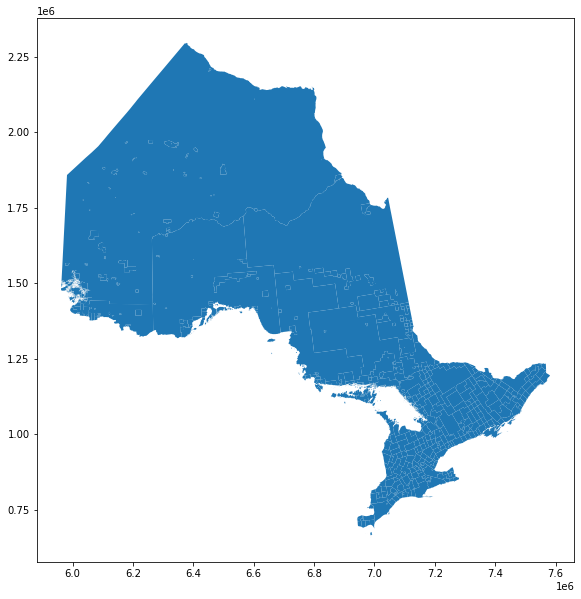

In [41]:
ontario.plot(figsize=(10,10))

In [47]:
ontario.drop(columns=['geometry'], axis=1).head()

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,ERUID,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE
1372,3544002,Gravenhurst,T,35,Ontario,3544,Muskoka,DM,3544002,Gravenhurst,3520,Muskoka--Kawarthas,997,5,None,None,None,None
1373,3544018,Bracebridge,T,35,Ontario,3544,Muskoka,DM,3544018,Bracebridge,3520,Muskoka--Kawarthas,997,5,None,None,None,None
1374,3549066,Callander,MU,35,Ontario,3549,Parry Sound,DIS,3549066,Callander,3590,Northeast / Nord-est,575,2,575,35575,North Bay,K
1614,3522014,Orangeville,T,35,Ontario,3522,Dufferin,CTY,3522012,Mono,3540,Kitchener--Waterloo--Barrie,535,1,535,35535,Toronto,B
1809,3507008,Prescott,T,35,Ontario,3507,Leeds and Grenville,UC,3507006,Augusta,3510,Ottawa,996,4,None,None,None,None


In [128]:
toronto = ontario[ontario['CMANAME']=='Toronto']
toronto.shape

(24, 19)

<AxesSubplot:>

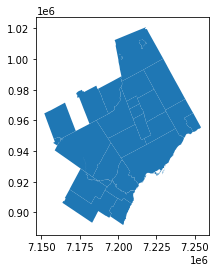

In [129]:
toronto.plot()

In [130]:
toronto.iloc[:3,:-1]

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,ERUID,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE
1614,3522014,Orangeville,T,35,Ontario,3522,Dufferin,CTY,3522012,Mono,3540,Kitchener--Waterloo--Barrie,535,1,535,35535,Toronto,B
1824,3519048,Newmarket,T,35,Ontario,3519,York,RM,3519048,Newmarket,3530,Toronto,535,1,535,35535,Toronto,B
1825,3519049,King,TP,35,Ontario,3519,York,RM,3519049,King,3530,Toronto,535,1,535,35535,Toronto,B


In [131]:
toronto.drop(columns=['PRUID','PRNAME','SACCODE','SACTYPE','CMAUID','CMAPUID','CMANAME','CMATYPE'], axis=1, inplace=True)

C:\Users\Owner\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [132]:
toronto.iloc[:,:-1]

,CSDUID,CSDNAME,CSDTYPE,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,ERUID,ERNAME
1614,3522014,Orangeville,T,3522,Dufferin,CTY,3522012,Mono,3540,Kitchener--Waterloo--Barrie
1824,3519048,Newmarket,T,3519,York,RM,3519048,Newmarket,3530,Toronto
1825,3519049,King,TP,3519,York,RM,3519049,King,3530,Toronto
1826,3519054,East Gwillimbury,T,3519,York,RM,3519054,East Gwillimbury,3530,Toronto
1827,3519070,Georgina,T,3519,York,RM,3519070,Georgina,3530,Toronto
1828,3519076,Chippewas of Georgina Island First Nation,IRI,3519,York,RM,3519070,Georgina,3530,Toronto
1829,3520005,Toronto,C,3520,Toronto,CDR,3520005,Toronto,3530,Toronto
1830,3521005,Mississauga,CY,3521,Peel,RM,3521010,Brampton,3530,Toronto
1831,3521010,Brampton,CY,3521,Peel,RM,3521010,Brampton,3530,Toronto
1832,3521024,Caledon,T,3521,Peel,RM,3521024,Caledon,3530,Toronto


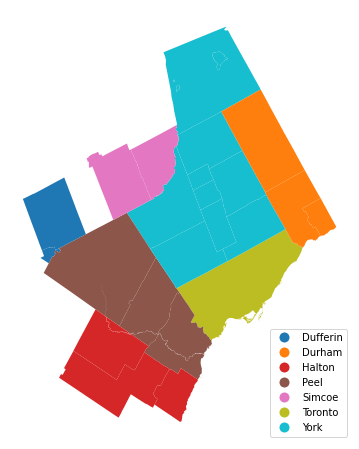

In [133]:
ax = toronto.plot(column='CDNAME', legend=True, legend_kwds={'loc': 'lower right'}, figsize=(8,8))
ax.axis('off')
plt.show()

## Attempt 8:

In [135]:
# dataset: Census metropolitan area/census agglomeration boundary files record layout
canada = gpd.read_file("zip:///Users\Owner\Desktop\mapping\data\lcma000b16a_e.zip")
canada.iloc[:,:-1]

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME
0,512,35512,Brockville,D,35,Ontario
1,442,24442,Trois-Rivières,B,24,Quebec / Québec
2,444,24444,Shawinigan,D,24,Quebec / Québec
3,447,24447,Drummondville,K,24,Quebec / Québec
4,450,24450,Granby,K,24,Quebec / Québec
...,...,...,...,...,...,...
151,845,48845,Cold Lake,D,48,Alberta
152,850,48850,Grande Prairie,K,48,Alberta
153,860,48860,Wood Buffalo,K,48,Alberta
154,865,48865,Wetaskiwin,D,48,Alberta


<AxesSubplot:>

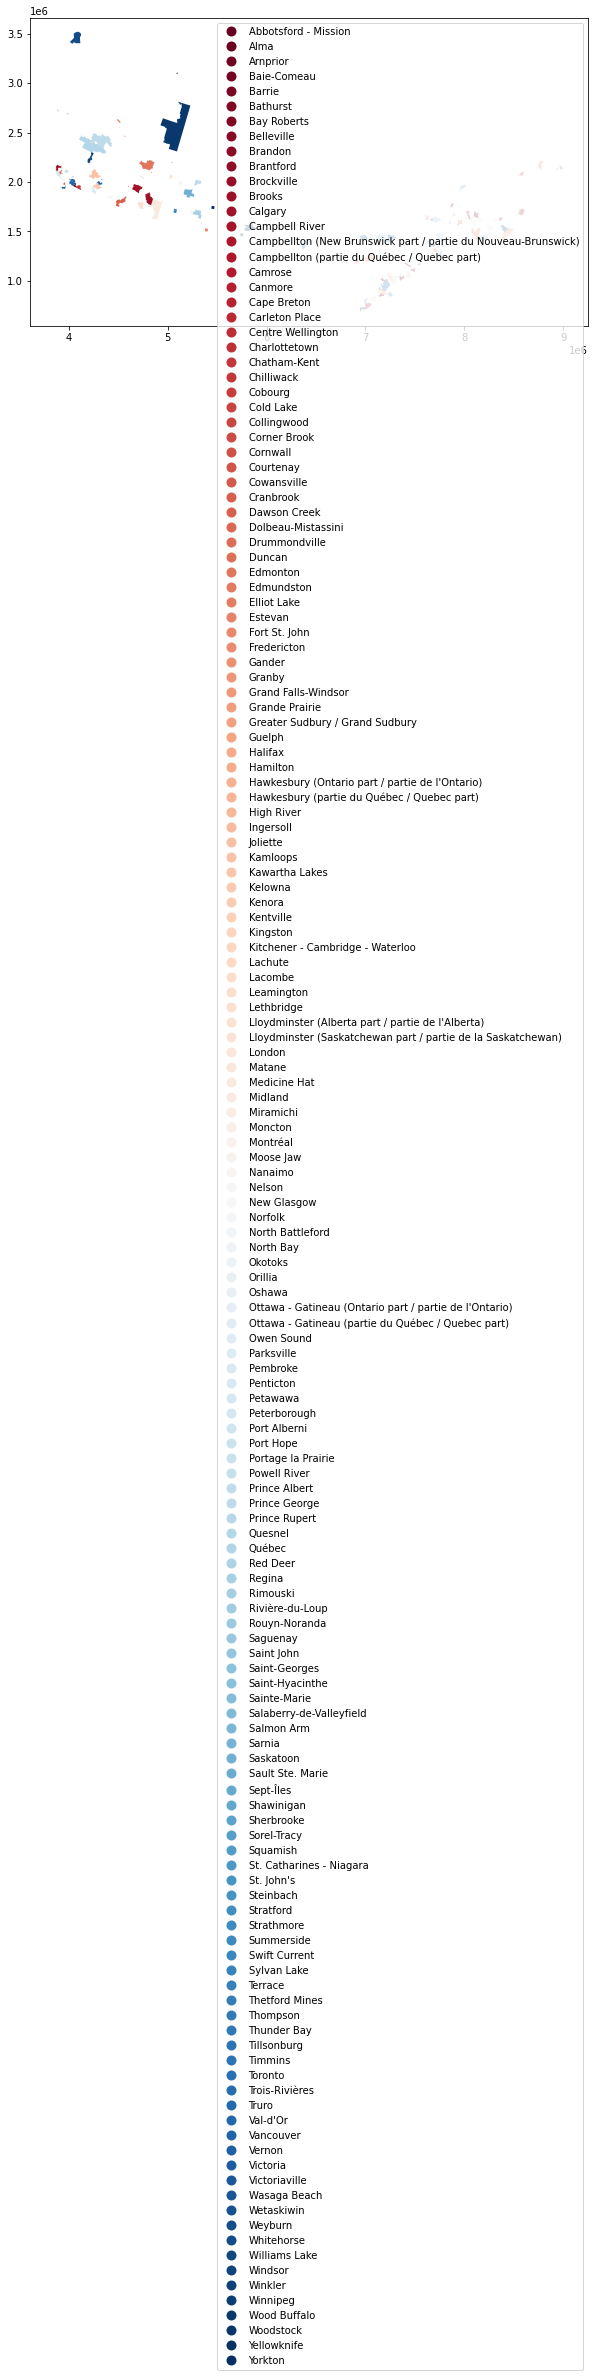

In [145]:
canada.plot(column='CMANAME', legend=True, cmap='RdBu', figsize=(10,10))

<AxesSubplot:>

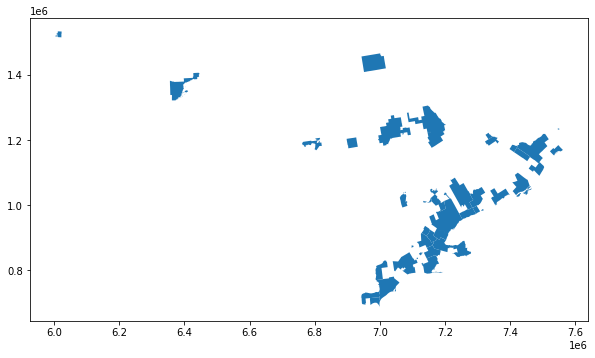

In [142]:
ontario = canada[canada['PRNAME']=='Ontario']
ontario.plot(figsize=(10,10))